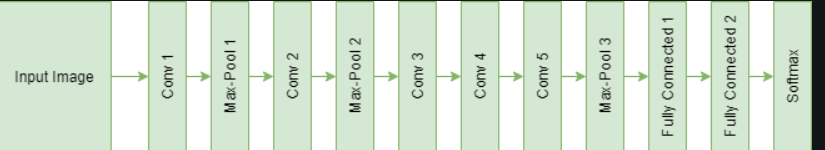

In [31]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Input
import tensorflow as tf
import numpy as np


In [32]:
alex_net=Sequential()
#first layer
alex_net.add(Conv2D(filters=96,input_shape=(32,32,3),kernel_size=(11,11),
                    strides=(4,4),
                    padding='Same',
                    ))
alex_net.add(BatchNormalization())
# each layer produces  scale of number some of large and some of small
# give me problem called (internal convariate shift)
#batch calc mean of layers and std to minimize overfitting and increase spedd of performance of model
alex_net.add(Activation('relu'))
alex_net.add(MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='same'))

#second layer

alex_net.add(Conv2D(filters=256,kernel_size=(5,5),strides=(1,1),padding='same',))
alex_net.add(BatchNormalization())
alex_net.add(Activation('relu'))
alex_net.add(MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='same'))

#third layer and fourth and fifth all conv2d
alex_net.add(Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding='same',))
alex_net.add(BatchNormalization())
alex_net.add(Activation('relu'))

alex_net.add(Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding='same',))
alex_net.add(BatchNormalization())
alex_net.add(Activation('relu'))

alex_net.add(Conv2D(filters=256,kernel_size=(3,3),strides=(1,1),padding='same',))
alex_net.add(BatchNormalization())
alex_net.add(Activation('relu'))
alex_net.add(MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='same'))


#flatten and fully connected
alex_net.add(Flatten())

alex_net.add(Dense(4096,input_shape=(32,32,3)))
alex_net.add(BatchNormalization())
alex_net.add(Activation('relu'))
alex_net.add(Dropout(0.4))

alex_net.add(Dense(4096))
alex_net.add(BatchNormalization())
alex_net.add(Activation('relu'))
alex_net.add(Dropout(0.4))

alex_net.add(Dense(1000))
alex_net.add(BatchNormalization())
alex_net.add(Activation('relu'))
alex_net.add(Dropout(0.4))

alex_net.add(Dense(10))
alex_net.add(BatchNormalization())
alex_net.add(Activation('softmax'))

alex_net.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)              │ (None, 8, 8, 96)       │        34,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_27          │ (None, 8, 8, 96)       │           384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_27 (Activation)      │ (None, 8, 8, 96)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 4, 4, 96)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 4, 4, 256)      │       614,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_28          │ (None, 4, 4, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_28 (Activation)      │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 2, 2, 384)      │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_29          │ (None, 2, 2, 384)      │         1,536 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_29 (Activation)      │ (None, 2, 2, 384)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 2, 2, 384)      │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_30          │ (None, 2, 2, 384)      │         1,536 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_30 (Activation)      │ (None, 2, 2, 384)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 2, 2, 256)      │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_31          │ (None, 2, 2, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_31 (Activation)      │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 1, 1, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 4096)           │     1,052,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_32          │ (None, 4096)           │        16,384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_32 (Activation)      │ (None, 4096)           │             

 Total params: 25,730,506 (98.15 MB)

 Trainable params: 25,709,350 (98.07 MB)

 Non-trainable params: 21,156 (82.64 KB)

In [33]:
alex_net.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [34]:
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [35]:
from sklearn.model_selection import train_test_split
X_train, x_val, y_train, y_val=train_test_split(X_train, y_train, test_size=0.3)
#Dimensions of the cifar 10
print(X_train.shape,y_train.shape)
print(x_val.shape,y_val.shape)
print(X_test.shape,y_test.shape)

(35000, 32, 32, 3) (35000, 1)
(15000, 32, 32, 3) (15000, 1)
(10000, 32, 32, 3) (10000, 1)


In [36]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_generator=ImageDataGenerator(rotation_range=2,horizontal_flip=True,
                                   zoom_range=0.1)
val_generator=ImageDataGenerator(rotation_range=2,horizontal_flip=True,zoom_range=0.1)
test_generator=ImageDataGenerator(rotation_range=2,horizontal_flip=True,zoom_range=0.1)

train_generator.fit(X_train)
val_generator.fit(x_val)
test_generator.fit(X_test)

In [39]:
from keras.callbacks import ReduceLROnPlateau

lrr = ReduceLROnPlateau(
    monitor='val_accuracy',
    factor=0.1,
    patience=3,
    min_lr=1e-5,
    mode='max'
)


In [40]:
alex_net.fit(train_generator.flow(X_train,y_train,batch_size=100),
                      epochs=5,
                      steps_per_epoch=int(X_train.shape[0]/100),
                      validation_data=val_generator.flow(x_val,y_val,batch_size=100),
                      validation_steps = 250,
                      callbacks = [lrr],
                      verbose=1)

Epoch 1/5
350/350 ━━━━━━━━━━━━━━━━━━━━ 117s 335ms/step - accuracy: 0.5038 - loss: 1.4091 - val_accuracy: 0.2905 - val_loss: 2.1267 - learning_rate: 0.0010
Epoch 2/5
350/350 ━━━━━━━━━━━━━━━━━━━━ 139s 398ms/step - accuracy: 0.5500 - loss: 1.2930 - val_accuracy: 0.4990 - val_loss: 1.4339 - learning_rate: 0.0010
Epoch 3/5
350/350 ━━━━━━━━━━━━━━━━━━━━ 141s 402ms/step - accuracy: 0.5832 - loss: 1.2025 - val_accuracy: 0.2971 - val_loss: 2.2850 - learning_rate: 0.0010
Epoch 4/5
350/350 ━━━━━━━━━━━━━━━━━━━━ 151s 431ms/step - accuracy: 0.6076 - loss: 1.1327 - val_accuracy: 0.3739 - val_loss: 1.8366 - learning_rate: 0.0010
Epoch 5/5
350/350 ━━━━━━━━━━━━━━━━━━━━ 167s 477ms/step - accuracy: 0.6305 - loss: 1.0718 - val_accuracy: 0.4775 - val_loss: 1.4959 - learning_rate: 0.0010


In [44]:
y_pred = alex_net.predict(x_val)
y_pred_classes = np.argmax(y_pred, axis=1)


y_true = np.argmax(y_val, axis=1)


469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step


In [45]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_true, y_pred_classes)
print(cm)


[[2509 4411  346 1735  561 2500  979  840  755  364]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]]
